In [96]:
#ex15.txt 记录了进口总额Y与三个自变量：国内生产总值X1、存储量X2、总消费X3 的值。 先对自变量进行主成分法分析，然后将得到的主成分与Y进行回归分析。
#试比较与直接进行回归分析所得到的结果差异，说说哪个模型的拟合效果比较好

In [97]:
import pandas as pd
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import numpy as np
import matplotlib.pyplot as plt

In [98]:
data=pd.read_table('ex15.txt',sep='\s+')
x=data.iloc[:,0:3];
y=data['y']


In [99]:
#主成分分析 
pca=PCA()
pca.fit(x)
print pca.explained_variance_ratio_

[ 0.99676249  0.00209367  0.00114384]


In [100]:
pca=PCA(n_components=1)
reduced_x=pca.fit_transform(x)

In [101]:
linreg1 = LinearRegression() 
linreg1.fit(reduced_x, y) 
print linreg1.intercept_ 
print linreg1.coef_ 

21.8909090909
[ 0.12086575]


In [102]:
y_pred1 = linreg1.predict(reduced_x) 
print "MAE:",metrics.mean_absolute_error(y,y_pred1) 
print "MSE:",metrics.mean_squared_error(y,y_pred1) 
print "RMSE:",np.sqrt(metrics.mean_squared_error(y,y_pred1)) 

linreg1.score(reduced_x,y)

MAE: 0.893685942093
MSE: 1.18250315042
RMSE: 1.08742960711


0.93699398434083836

In [103]:
#多元线性回归分析 
linreg = LinearRegression() 
linreg.fit(x, y) 
print linreg.intercept_ 
print linreg.coef_ 
y_pred2= linreg.predict(x) 
#误差评估 
print "MAE:",metrics.mean_absolute_error(y,y_pred2) 
print "MSE:",metrics.mean_squared_error(y,y_pred2) 
print "RMSE:",np.sqrt(metrics.mean_squared_error(y,y_pred2)) 

-10.1279881552
[-0.05139616  0.58694904  0.28684868]
MAE: 0.323389955272
MSE: 0.152086314666
RMSE: 0.389982454306


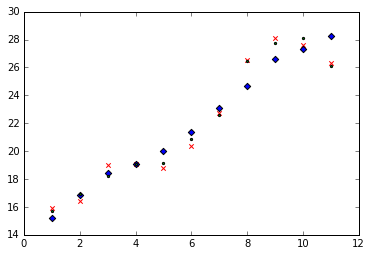

In [104]:
k=range(1,12) 
%matplotlib inline 
plt.scatter(k, y, c='r', marker='x') 
plt.scatter(k, y_pred1, c='b', marker='D') 
plt.scatter(k, y_pred2, c='g', marker='.') 
plt.show()